<a href="https://colab.research.google.com/github/kewal-17/ai-391l/blob/main/hw1_programming_solution_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint
import pandas as pd

In [3]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [4]:
# Loading the dataset from sklearn datasets
cancer_data_set = load_breast_cancer()

# Importing the data into dataframe for easier manipulation and processing
df = pd.DataFrame(cancer_data_set["data"], columns=cancer_data_set["feature_names"])

df["target"] = cancer_data_set["target"]

In [30]:
from functools import total_ordering
total_malignant = len(np.where(df["target"] == 0)[0])
total_data = df.shape[0]
probability_malignant_cancer = total_malignant / total_data
print(f"Probability of malignant cancer = {probability_malignant_cancer}")

Probability of malignant cancer = 0.37258347978910367


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


In [7]:
# Taking features as X and labels or targets as y
X = df.drop(columns="target")
y = df["target"]

max_depth = range(1,11)

full_data_accuracies = []
cv_accuracies = []

for depth in max_depth:
  # Initialise the tree
  clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)

  # Fit the model
  clf.fit(X, y)

  # Calculate accuracy and add to list
  full_data_accuracies.append(clf.score(X, y))

  # 10-fold CV accuracy
  cv_score = cross_val_score(clf, X, y, cv=10)
  cv_accuracies.append((cv_score.mean()))

In [9]:
# Quick check
print(full_data_accuracies)
print(cv_accuracies)

[0.9226713532513181, 0.9420035149384886, 0.9789103690685413, 0.9824253075571178, 0.9947275922671354, 0.9982425307557118, 1.0, 1.0, 1.0, 1.0]
[0.8893170426065163, 0.9192042606516291, 0.9069235588972431, 0.9104323308270675, 0.9209899749373432, 0.9174498746867167, 0.9157268170426063, 0.9122180451127818, 0.9122180451127818, 0.9122180451127818]


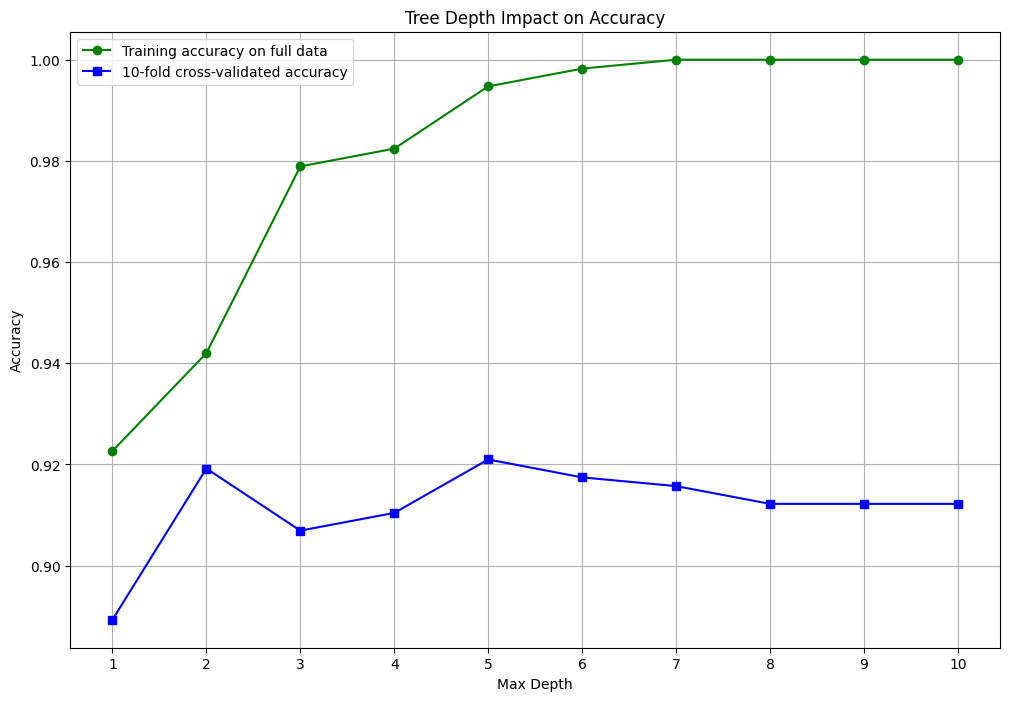

In [34]:
# Plotting the results
plt.figure(figsize=FIGSIZE)

# Adding the series on graph
plt.plot(max_depth, full_data_accuracies, color="g", label="Training accuracy on full data", marker="o")
plt.plot(max_depth, cv_accuracies, color="b", label="10-fold cross-validated accuracy", marker="s")

# Adding titles and labels
plt.xlabel('Max Depth')
plt.xticks(max_depth)
plt.ylabel('Accuracy')
plt.title('Tree Depth Impact on Accuracy')

# Add a legend
plt.legend()

# Adding grid for better visibility
plt.grid(True)

# Show the plot
plt.show()

### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:**  **Max depth of 7 onwards, ie, 7, 8, 9, 10 gives the best accuracy.**

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** **Max depth 5 gives the best accuracy**



## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

In [10]:
# From 2(b)ii we pick max_depth as 5
max_depth = 5

n_estimators = range(1,21)

random_forest_cv_accuracies = []
random_forest_full_data_accuracies = []

for estimator in n_estimators:
  # Initialise the forest
  rf = ensemble.RandomForestClassifier(n_estimators=estimator, max_depth=max_depth, random_state=RANDOM_STATE)

  # Ft the model
  rf.fit(X, y)

  # Calculate accuracy and add to list
  random_forest_full_data_accuracies.append(rf.score(X, y))

  # 10-fold CV accuracy
  rf_cv_score = cross_val_score(rf, X, y, cv=10)
  random_forest_cv_accuracies.append(rf_cv_score.mean())

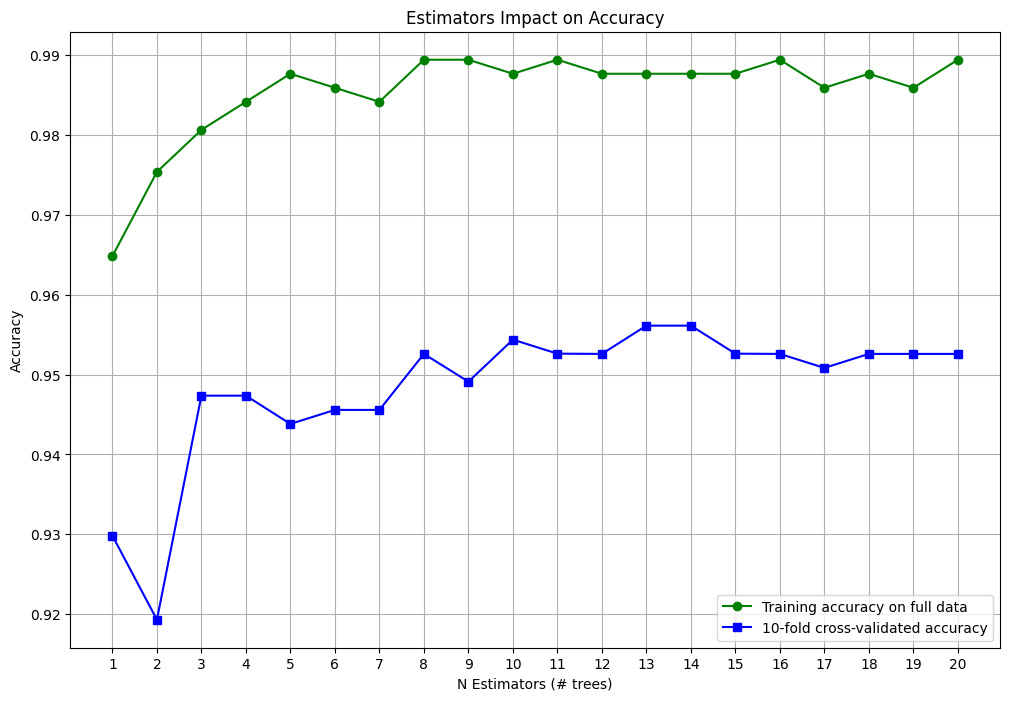

In [33]:
# Plotting the results
plt.figure(figsize=FIGSIZE)

# Adding the series on graph
plt.plot(n_estimators, random_forest_full_data_accuracies, color="g", label="Training accuracy on full data", marker="o")
plt.plot(n_estimators, random_forest_cv_accuracies, color="b", label="10-fold cross-validated accuracy", marker="s")

# Adding titles and labels
plt.xlabel('N Estimators (# trees)')
plt.xticks(n_estimators)
plt.ylabel('Accuracy')
plt.title('Estimators Impact on Accuracy')

# Add a legend
plt.legend()

# Adding grid for better visibility
plt.grid(True)

# Show the plot
plt.show()

In [16]:
# printing to compare both sets of accuracies in a more easier way
index = 1
for item1, item2 in zip(random_forest_full_data_accuracies, random_forest_cv_accuracies):
    print(f"{index} {item1} {item2}")
    index += 1

print((np.argmax(random_forest_cv_accuracies))+1)

1 0.9648506151142355 0.9298245614035088
2 0.9753954305799648 0.9192982456140351
3 0.9806678383128296 0.9473684210526316
4 0.984182776801406 0.9473684210526316
5 0.9876977152899824 0.943828320802005
6 0.9859402460456942 0.9455827067669172
7 0.984182776801406 0.9455827067669172
8 0.9894551845342706 0.9526002506265664
9 0.9894551845342706 0.9491228070175438
10 0.9876977152899824 0.9543859649122807
11 0.9894551845342706 0.9526315789473683
12 0.9876977152899824 0.9526002506265664
13 0.9876977152899824 0.956140350877193
14 0.9876977152899824 0.956140350877193
15 0.9876977152899824 0.9526315789473685
16 0.9894551845342706 0.9526002506265664
17 0.9859402460456942 0.9508458646616542
18 0.9876977152899824 0.9526002506265666
19 0.9859402460456942 0.9526002506265664
20 0.9894551845342706 0.9526002506265664
13


### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** **While there is a dip when estimators is 2, generally speaking there is a significant improvement when we use random forests over just a single tree. For ex when n_estimators = 1 , the 10 fold cv accuracy is 0.93 vs when n_estimators = 10 then accuracy is >0.95, similalry for other values as well.**

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:** **13 and 14 are giving the best accuracy and have the same value.**

### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

In [17]:
# From 3c above we take n_estimator as 13.
chosen_estimator = 13

max_depth = range(1, 11)

random_forest_cv_accuracies_fixed_estimator = []

for depth in max_depth:
  # Initialise the forest
  rf = ensemble.RandomForestClassifier(n_estimators=chosen_estimator, max_depth=depth, random_state=RANDOM_STATE)

  # 10-fold CV accuracy
  rf_cv_score = cross_val_score(rf, X, y, cv=10)
  random_forest_cv_accuracies_fixed_estimator.append(rf_cv_score.mean())

In [20]:
print(random_forest_cv_accuracies_fixed_estimator)
print(np.argmax(random_forest_cv_accuracies_fixed_estimator)+1)

[0.9156954887218045, 0.9368107769423559, 0.9578947368421054, 0.9543546365914788, 0.956140350877193, 0.9596491228070176, 0.9543859649122807, 0.9578947368421054, 0.9543859649122807, 0.9543859649122807]
6


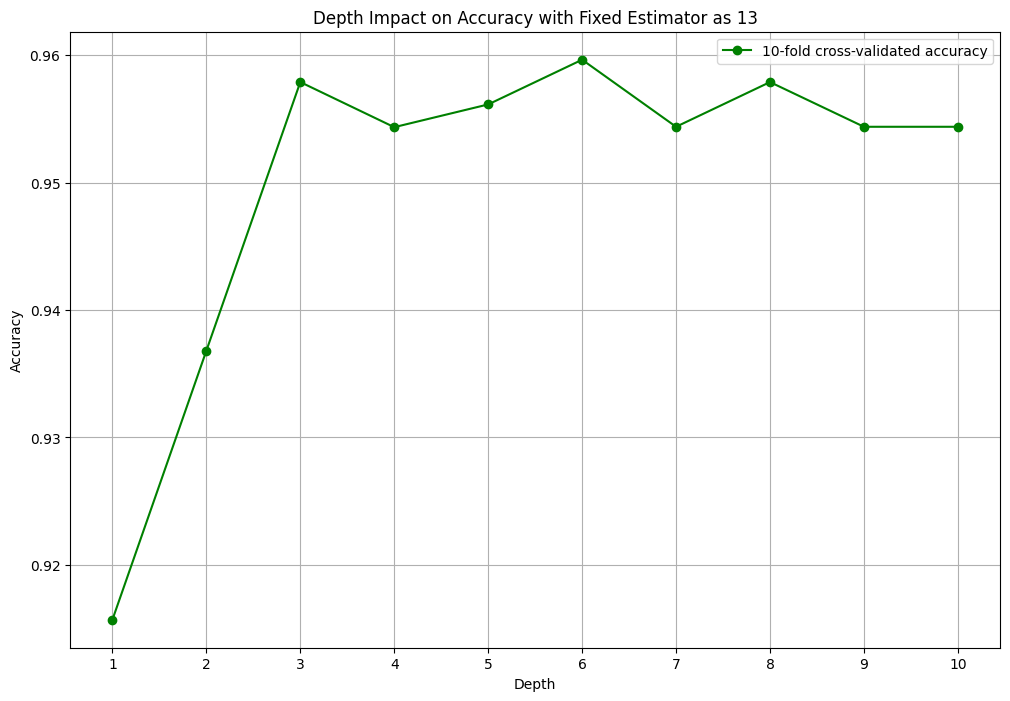

In [32]:
# Plotting the results
plt.figure(figsize=FIGSIZE)

# Adding the series on graph
plt.plot(max_depth, random_forest_cv_accuracies_fixed_estimator, color="g", label="10-fold cross-validated accuracy", marker="o")

# Adding titles and labels
plt.xlabel('Depth')
plt.xticks(max_depth)
plt.ylabel('Accuracy')
plt.title('Depth Impact on Accuracy with Fixed Estimator as 13')

# Add a legend
plt.legend()

# Adding grid for better visibility
plt.grid(True)

# Show the plot
plt.show()

### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** **No, it is not the same. The optimal setting for `max_depth` is at depth value 6 where we get the max accuracy**


*   With 5 as depth (in 2b) -> Accuracy was 92.09%
*   With 6 as depth -> Accuracy is 95.96%



## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

In [21]:
max_depth = range(1,11)
random_state = range(0,100)

cv_accuracies_random_states = defaultdict()

for state in random_state:

  accuracies = []

  for depth in max_depth:

    # Initialise the tree
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=state)

    # 10-fold CV accuracy
    cv_score = cross_val_score(clf, X, y, cv=10)
    accuracies.append((cv_score.mean()))

  cv_accuracies_random_states[state] = accuracies

In [22]:
# Best max depth for each random state
state_accuracies = {}
for state,accuracies in cv_accuracies_random_states.items():
  max_accuracy = max(accuracies)
  state_accuracies[state] = [i+1 for i, value in enumerate(accuracies) if value == max_accuracy]

In [27]:
# Getting the data ready to plot
depth_params = [0]* len(max_depth)
for state,accuracies in cv_accuracies_random_states.items():
   max_accuracy = max(accuracies)
   for i, value in enumerate(accuracies):
    if value == max_accuracy:
        depth_params[i] += 1

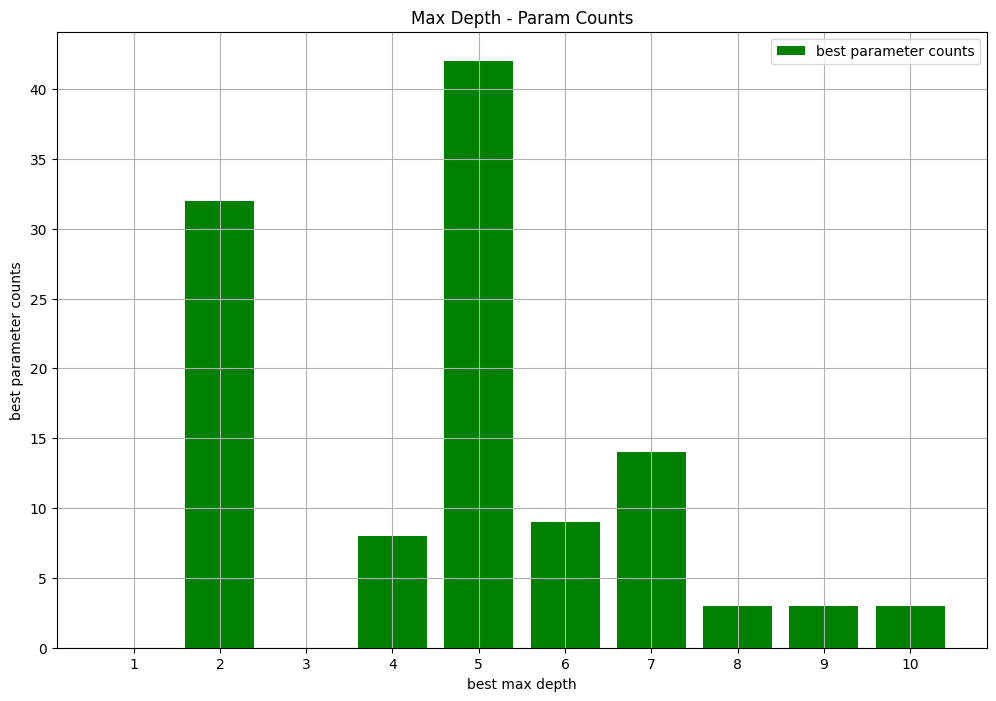

In [31]:
# Plotting the results
plt.figure(figsize=FIGSIZE)

# Adding the series on graph
plt.bar(max_depth, depth_params, color="g", label="best parameter counts")

# Adding titles and labels
plt.xlabel('best max depth')
plt.xticks(max_depth)
plt.ylabel('best parameter counts')
plt.title('Max Depth - Param Counts')

# Add a legend
plt.legend()

# Adding grid for better visibility
plt.grid(True)

# Show the plot
plt.show()

### (b)
What are the top two most frequent parameter settings?

**Student answer here:** **5 and 2**